In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(df.shape)
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()
df.isnull().sum()

df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

np.int64(0)

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:
df.to_csv("cleaned_hr_attrition.csv", index=False)
print("Cleaned data saved!")


Cleaned data saved!


In [ ]:
pd.read_csv("cleaned_hr_attrition.csv")

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
plt.axis


<function matplotlib.pyplot.axis(arg: 'tuple[float, float, float, float] | bool | str | None' = None, /, *, emit: 'bool' = True, **kwargs) -> 'tuple[float, float, float, float]'>

In [ ]:
import pandas as pd

# Load your file
df = pd.read_csv("cleaned_hr_attrition.csv")
print(df.columns.tolist())



['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


In [ ]:
import pandas as pd

# Show actual column names
print("\nBefore Cleaning:\n", df.columns.tolist())

# Clean column names: lowercase + underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

print("\nAfter Cleaning:\n", df.columns.tolist())

# Save fixed version
df.to_csv("cleaned_hr_attrition_fixed.csv", index=False)
print("\nFile saved as 'cleaned_hr_attrition_fixed.csv'")



Before Cleaning:
 ['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

After Cleaning:
 ['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 

In [ ]:

df = pd.read_csv("cleaned_hr_attrition_fixed.csv")

print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum().sum())
print("\nAttrition %:\n", df['attrition'].value_counts(normalize=True) * 100)




Shape: (1470, 35)

Missing values:
 0

Attrition %:
 attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [ ]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
	df.drop_duplicates()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
	df.dropna()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


/tmp/ipython-input-1725896607.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attrition.index, y=attrition, palette='coolwarm')


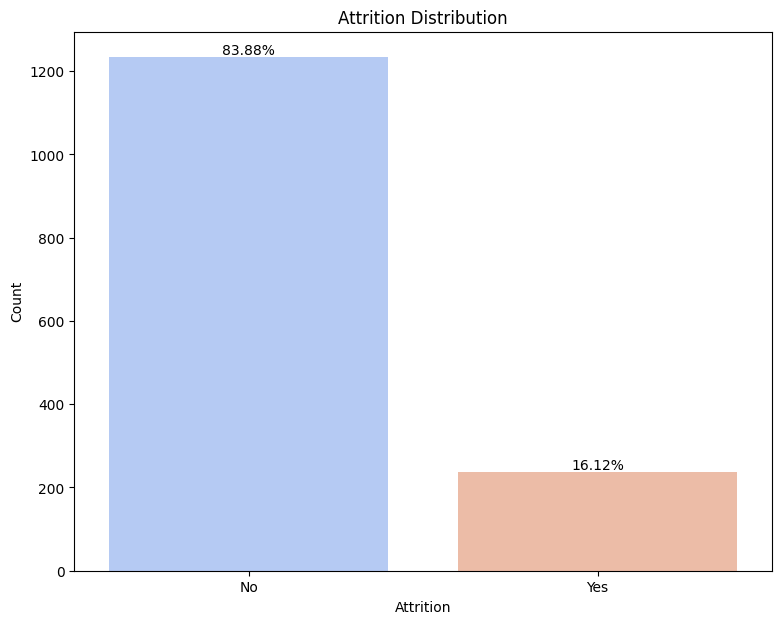

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

attrition = df['attrition'].value_counts()

plt.figure(figsize=(9,7))

ax = sns.barplot(x=attrition.index, y=attrition, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df) * 100:.2f}%',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                ha='center', va='bottom')

plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

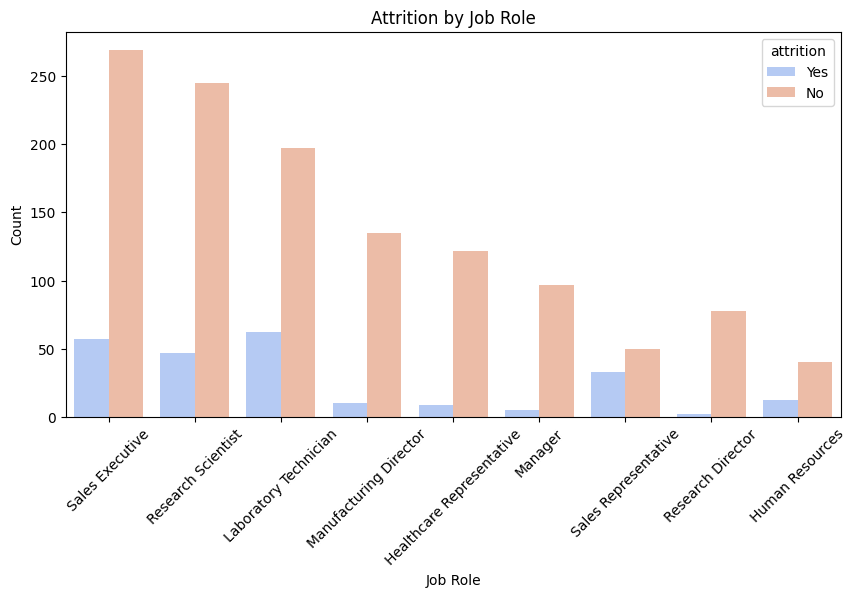

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='jobrole', hue='attrition', palette='coolwarm')
plt.title("Attrition by Job Role")
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

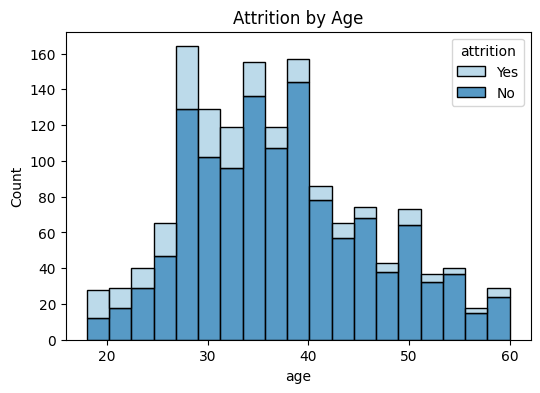

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='attrition', multiple='stack', palette='Paired')
plt.title("Attrition by Age")
plt.show()

In [ ]:
avg_tenure = df['yearsatcompany'].mean()

print(f'Average years of employee to leave the company is {avg_tenure:.2f} years')

Average years of employee to leave the company is 7.01 years


/tmp/ipython-input-3812012064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[1], palette='coolwarm')
/tmp/ipython-input-3812012064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', ax=axes[2], palette='coolwarm')


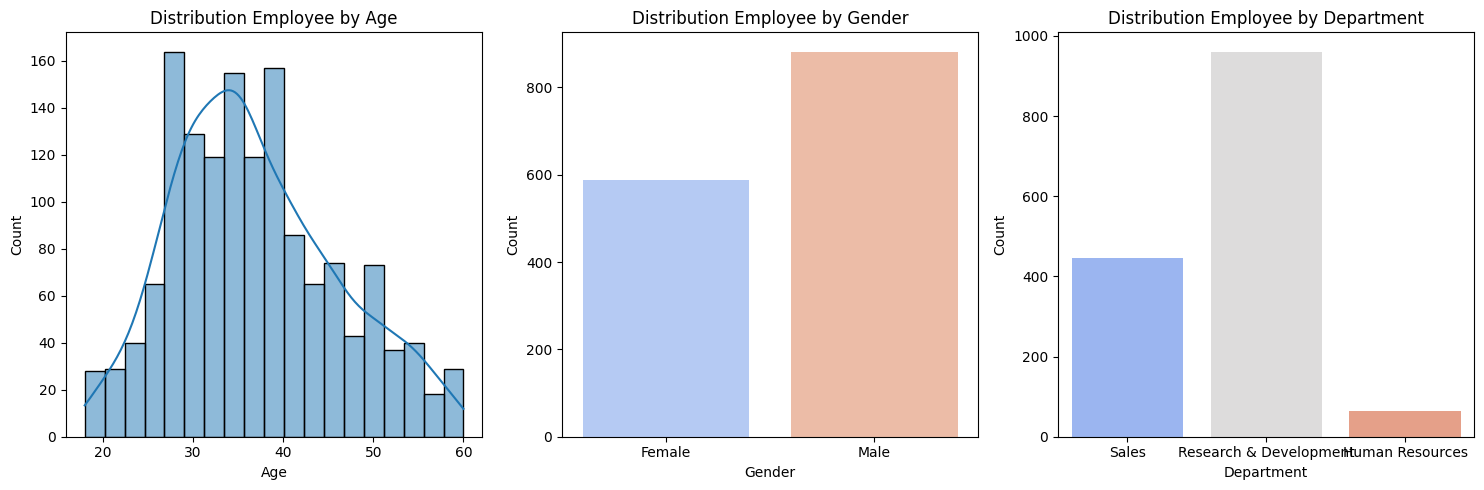

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

sns.histplot(data=df, x='age', kde=True, ax=axes[0])
axes[0].set_title('Distribution Employee by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='gender', ax=axes[1], palette='coolwarm')

axes[1].set_title('Distribution Employee by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='department', ax=axes[2], palette='coolwarm')
axes[2].set_title('Distribution Employee by Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

/tmp/ipython-input-452028256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='Set3')


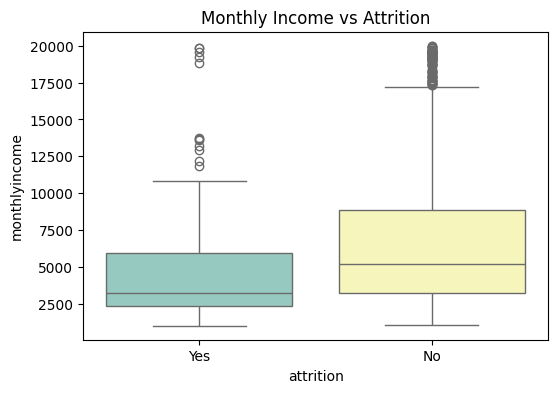

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='Set3')
plt.title("Monthly Income vs Attrition")
plt.show()

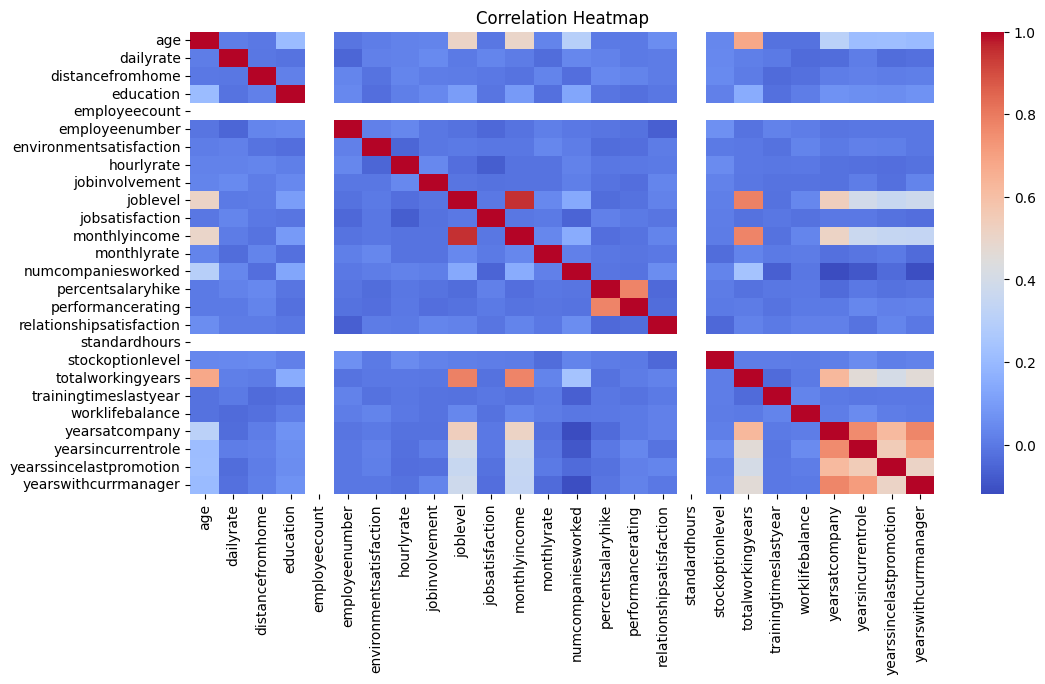

In [ ]:
df['attrition_numeric'] = df['attrition']

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [3]:
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column,'attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'attritionrate']
    return attrition_rate_df